In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)


2.4.1


In [2]:
# ##def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [3]:
# filepath = './cifar-10-batches-py/data_batch_1'
# data = unpickle(filepath)

In [4]:
# data[b'data'].shape

In [8]:
# load train and test dataset
def load_dataset():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    print('ifinished loading the dataset')
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    print('ifinished prep the dataset')
    # define model
    model = define_model()
    print('ifinished defining model')
    print(model.summary())
    # fit model
    history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=0)
    print('ifinished training the model')
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    # entry point, run the test harness

In [9]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,DepthwiseConv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, Adam

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model(depthwise=False):
    model = Sequential()
    if depthwise:
        model.add(DepthwiseConv2D((3, 3), activation='relu', kernel_initializer='he_uniform', 
                                  strides=(2, 2), padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(32, (1,1)))
        model.add(DepthwiseConv2D((3, 3), activation='relu', kernel_initializer='he_uniform',
                                 strides=(2, 2), padding='same'))
        model.add(Conv2D(64, (1,1)))
    else:
    
        model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
            strides=(2,2), padding='same', input_shape=(32, 32, 3)))
        model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
            strides=(2,2), padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
#    pyplot.savefig(filename + '_plot.png')
    pyplot.show()
    pyplot.close()
    

ifinished loading the dataset
ifinished prep the dataset
ifinished defining model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d (DepthwiseC (None, 16, 16, 3)         30        
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 32)        128       
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          2112      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
________________________________________

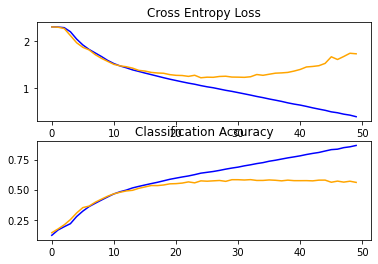

In [10]:
#with Depthwise
# load dataset
trainX, trainY, testX, testY = load_dataset()
print('ifinished loading the dataset')
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
print('ifinished prep the dataset')
# define model
model = define_model(depthwise=True)
print('ifinished defining model')
print(model.summary())
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=0)
print('ifinished training the model')
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)
# entry point, run the test harness

In [11]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('aeroplane.jpeg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

<class 'numpy.ndarray'>
(32, 32, 3)


In [12]:
data_norm = data.astype('float32')

In [13]:
data_norm

array([[[ 45., 132., 209.],
        [ 48., 132., 204.],
        [ 52., 132., 195.],
        ...,
        [ 52., 139., 206.],
        [ 53., 141., 205.],
        [ 54., 142., 206.]],

       [[ 53., 129., 207.],
        [ 53., 129., 205.],
        [ 54., 130., 205.],
        ...,
        [ 55., 137., 210.],
        [ 56., 138., 211.],
        [ 57., 140., 210.]],

       [[ 54., 130., 206.],
        [ 53., 130., 208.],
        [ 50., 131., 210.],
        ...,
        [ 58., 136., 211.],
        [ 60., 136., 212.],
        [ 63., 136., 213.]],

       ...,

       [[219., 222., 237.],
        [216., 216., 228.],
        [217., 213., 227.],
        ...,
        [167., 187., 211.],
        [162., 183., 200.],
        [165., 187., 200.]],

       [[211., 221., 231.],
        [218., 222., 231.],
        [223., 221., 232.],
        ...,
        [162., 183., 214.],
        [161., 180., 210.],
        [171., 190., 220.]],

       [[195., 210., 217.],
        [211., 220., 225.],
        [221., 2

In [14]:
data_norm = data_norm/255.0

In [15]:
data_norm = data_norm.reshape([1,32,32,3])

In [16]:
model.predict(data_norm)

array([[9.9996209e-01, 8.8566487e-10, 2.6932868e-05, 2.5329623e-09,
        4.2732740e-06, 6.5456314e-11, 1.4802873e-09, 1.5911971e-09,
        1.1780155e-07, 6.5877384e-06]], dtype=float32)

In [17]:
trainX.shape

(50000, 32, 32, 3)

In [18]:
data_norm.shape

(1, 32, 32, 3)

In [19]:
data_norm.reshape([1,32,32,3])

array([[[[0.1764706 , 0.5176471 , 0.81960785],
         [0.1882353 , 0.5176471 , 0.8       ],
         [0.20392157, 0.5176471 , 0.7647059 ],
         ...,
         [0.20392157, 0.54509807, 0.80784315],
         [0.20784314, 0.5529412 , 0.8039216 ],
         [0.21176471, 0.5568628 , 0.80784315]],

        [[0.20784314, 0.5058824 , 0.8117647 ],
         [0.20784314, 0.5058824 , 0.8039216 ],
         [0.21176471, 0.50980395, 0.8039216 ],
         ...,
         [0.21568628, 0.5372549 , 0.8235294 ],
         [0.21960784, 0.5411765 , 0.827451  ],
         [0.22352941, 0.54901963, 0.8235294 ]],

        [[0.21176471, 0.50980395, 0.80784315],
         [0.20784314, 0.50980395, 0.8156863 ],
         [0.19607843, 0.5137255 , 0.8235294 ],
         ...,
         [0.22745098, 0.53333336, 0.827451  ],
         [0.23529412, 0.53333336, 0.83137256],
         [0.24705882, 0.53333336, 0.8352941 ]],

        ...,

        [[0.85882354, 0.87058824, 0.92941177],
         [0.84705883, 0.84705883, 0.89411765]